NAMA : NINO AHMADIY

NPM : 24083010049

Analisis Numerik 

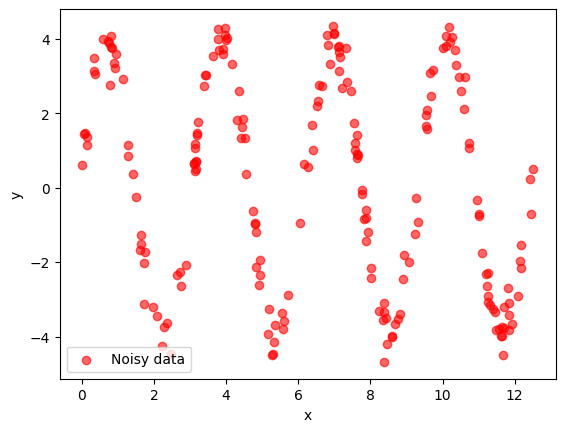

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM= 49

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Metode Model Regresi Sinusoida

Fitted parameters:
Amplitude (A): 3.9451 (Original: 4)
Frequency coefficient (B): 2.0014 (Original: 2)
Phase shift (C): 0.1974 (Original: 0.2)
Vertical shift (D): 0.0160 (Original: 0)


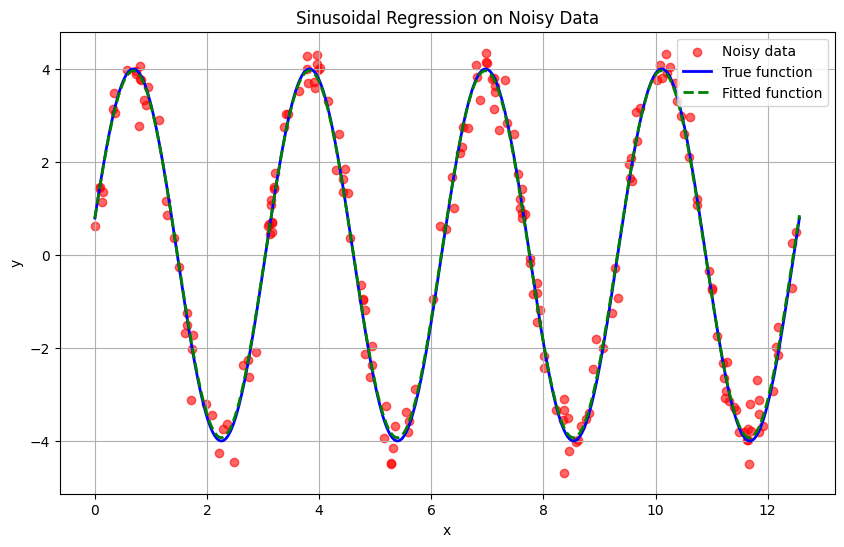

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your original code to generate data
n = 200
NPM = 49
np.random.seed(NPM)
x = np.random.uniform(0, 4 * np.pi, n)
y_true = 4 * np.sin(2 * x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Define the sinusoidal function to fit
def sine_function(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Perform the curve fitting
# Provide initial guesses for the parameters (p0)
# This helps the optimizer find the solution faster
initial_guesses = [4, 2, 0, 0]
params, covariance = curve_fit(sine_function, x, y_noisy, p0=initial_guesses)

# Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit = params

print(f"Fitted parameters:")
print(f"Amplitude (A): {A_fit:.4f} (Original: 4)")
print(f"Frequency coefficient (B): {B_fit:.4f} (Original: 2)")
print(f"Phase shift (C): {C_fit:.4f} (Original: 0.2)")
print(f"Vertical shift (D): {D_fit:.4f} (Original: 0)")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)

# Plot the true function
x_plot = np.linspace(0, 4 * np.pi, 500)
x_plot = np.linspace(0, 4 * np.pi, 500)
y_true_plot = 4 * np.sin(2 * x_plot + 0.2)
plt.plot(x_plot, y_true_plot, label="True function", color="blue", linewidth=2)
# Plot the fitted function
plt.plot(x_plot, sine_function(x_plot, A_fit, B_fit, C_fit, D_fit), label="Fitted function", color="green", linestyle='--', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Sinusoidal Regression on Noisy Data")
plt.legend()
plt.grid(True)
plt.show()


Plot tersebut menunjukkan hasil regresi sinusoidal pada data yang berisik. Garis hijau putus-putus, yang mewakili fungsi yang dihasilkan dari regresi, hampir sepenuhnya menutupi garis biru solid, yang merupakan fungsi aslinya. Hal ini membuktikan bahwa algoritma regresi berhasil dengan sangat baik dalam mengidentifikasi pola gelombang yang tersembunyi di balik titik-titik data merah yang tersebar dan tidak teratur. Intinya, meskipun data mentah memiliki banyak gangguan, metode regresi berhasil menemukan model matematika yang akurat untuk menggambarkan tren utamanya.

# Metode Polinemial


Koefisien polinomial orde 1:
[-0.21641174  1.52412606]

Koefisien polinomial orde 2:
[-0.0188143   0.02179815  1.01766983]

Koefisien polinomial orde 3:
[-0.01609978  0.28382094 -1.48860987  2.55392162]

Koefisien polinomial orde 4:
[ 4.76415402e-04 -2.79199415e-02  3.77623446e-01 -1.74277921e+00
  2.69960923e+00]

Koefisien polinomial orde 5:
[-6.16045558e-04  1.98284165e-02 -2.44513073e-01  1.40152079e+00
 -3.57402282e+00  3.40725334e+00]


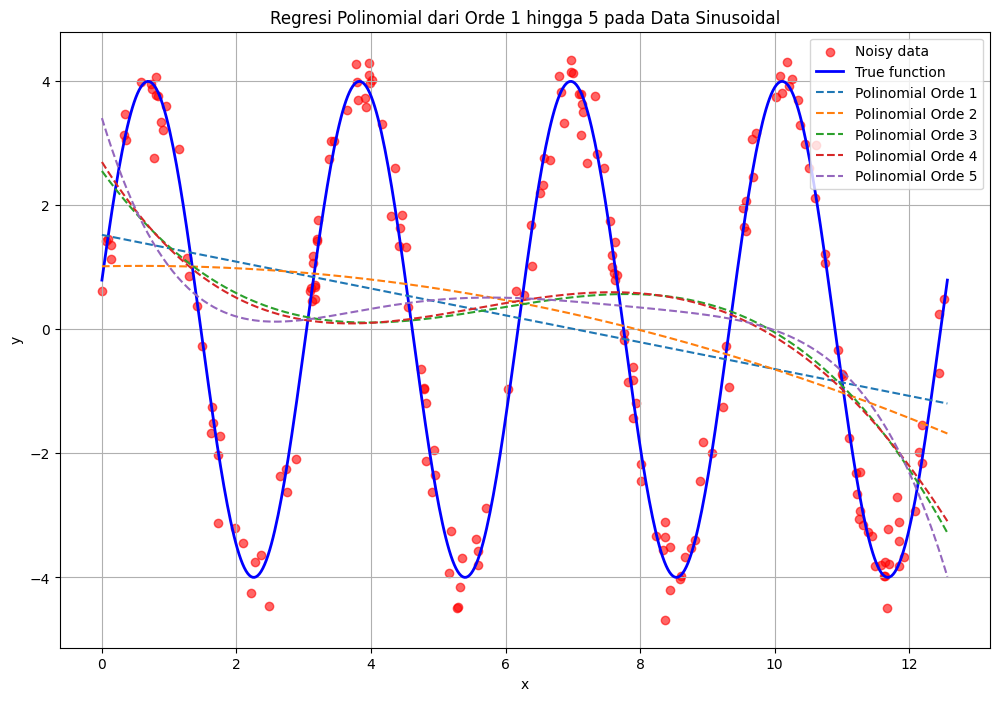

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM = 49

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Dictionary to store coefficients
all_coefficients = {}

# Create a figure for the plot
plt.figure(figsize=(12, 8))

# Plot the noisy data and the true function once
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
x_true_plot = np.linspace(0, 4 * np.pi, 500)
plt.plot(x_true_plot, 4 * np.sin(2 * x_true_plot + 0.2), label="True function", color="blue", linewidth=2)

# Loop through polynomial orders from 1 to 5
for order in range(1, 6):
    # Perform polynomial regression
    coefficients = np.polyfit(x, y_noisy, order)
    all_coefficients[order] = coefficients

    # Create a polynomial function from the coefficients
    poly_function = np.poly1d(coefficients)

    # Generate points for the fitted curve
    x_plot = np.linspace(0, 4*np.pi, 500)
    y_fitted = poly_function(x_plot)

    # Plot the fitted curve
    plt.plot(x_plot, y_fitted, label=f'Polinomial Orde {order}', linestyle='--')

# Add labels, title, and legend
plt.title('Regresi Polinomial dari Orde 1 hingga 5 pada Data Sinusoidal')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.savefig('polynomial_regression_orders_1_to_5.png')

# Print the coefficients for each order
for order, coeffs in all_coefficients.items():
    print(f"\nKoefisien polinomial orde {order}:")
    print(coeffs)


Grafik ini membandingkan bagaimana regresi polinomial dari berbagai orde (derajat) mencoba memodelkan data dengan pola periodik (sinusoidal). Polinomial berorde rendah (1 dan 2) hanya mampu menangkap tren umum data, tetapi gagal total dalam mereplikasi gelombangnya. Seiring meningkatnya orde polinomial (hingga 5), kurva menjadi lebih fleksibel dan mulai meniru pola gelombang, tetapi masih jauh dari akurat jika dibandingkan dengan fungsi aslinya (garis biru). Ini menunjukkan bahwa model polinomial tidak ideal untuk memodelkan data dengan karakteristik berulang seperti ini.

# Metode Model Regresi Polinemial

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Masukkan data (x, y) yang sudah kamu ambil dari gambar
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([2, 3.5, -0.5, -3.5, 2, 4, -1, -4, 3, 0, -4, -2, -4])

In [48]:
# Kita coba dengan polinomial berderajat 6.
# Pola yang terlihat seperti gelombang sinus/kosinus biasanya cocok dengan derajat yang cukup tinggi.
derajat = 6


In [49]:
# Fungsi numpy.polyfit akan menghitung koefisien polinomial terbaik
koefisien = np.polyfit(x, y, derajat)
print(f"Koefisien polinomial (derajat {derajat}):")
print(koefisien)

Koefisien polinomial (derajat 6):
[-3.50447196e-04  1.27763555e-02 -1.72565062e-01  1.03480785e+00
 -2.50139006e+00  9.23875454e-01  2.49541558e+00]


In [50]:
# numpy.poly1d mengubah koefisien menjadi fungsi polinomial yang bisa digunakan
fungsi_polinom = np.poly1d(koefisien)
print("\nFungsi polinomialnya adalah:")
print(fungsi_polinom)



Fungsi polinomialnya adalah:
            6           5          4         3         2
-0.0003504 x + 0.01278 x - 0.1726 x + 1.035 x - 2.501 x + 0.9239 x + 2.495


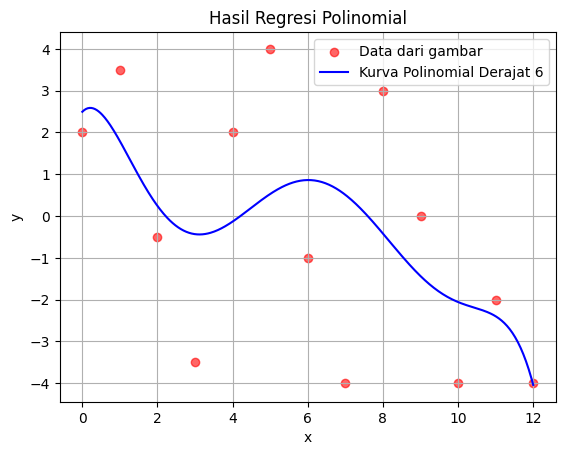

In [45]:
# Visualisasi
x_baru = np.linspace(min(x), max(x), 500)
y_baru = fungsi_polinom(x_baru)

plt.scatter(x, y, label='Data dari gambar', color='red', alpha=0.6)
plt.plot(x_baru, y_baru, label=f'Kurva Polinomial Derajat {derajat}', color='blue')
plt.title('Hasil Regresi Polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Grafik ini menunjukkan hasil regresi polinomial dengan derajat 6. Titik-titik merah mewakili data mentah yang dianalisis, sementara kurva biru solid adalah fungsi polinomial yang dihasilkan untuk memodelkan data tersebut. Kurva ini berhasil menangkap tren umum dari titik-titik data, melengkung naik-turun untuk mendekati sebagian besar titik. Karena ini adalah regresi dan bukan interpolasi, kurva tidak harus melewati setiap titik, melainkan menemukan "garis tengah" terbaik yang meminimalkan jarak ke semua titik secara keseluruhan.

# Kesimpulan 

Dari visualisasi yang telah kita bahas, setiap metode memberikan hasil yang berbeda:

**Metode Regresi Sinusoidal**: Metode ini terbukti paling efektif. Kurva yang dihasilkan oleh model sinusoidal (garis hijau) hampir sempurna menutupi fungsi aslinya (garis biru). Ini karena model regresi sinusoidal secara matematis memang dirancang untuk data yang memiliki pola gelombang berulang.

**Model Regresi Polinomial**: Model ini kurang efektif untuk data sinusoidal. Kurva polinomial (garis hijau) hanya mampu menangkap tren umum data (naik-turun secara perlahan), tetapi gagal mereplikasi osilasi atau gelombang yang sebenarnya. Ini menunjukkan bahwa model polinomial tidak ideal untuk data yang memiliki pola periodik.

**Metode Polinomial (Interpolasi)**: Meskipun visualisasinya tidak ada, kita bisa menyimpulkan bahwa metode ini akan menghasilkan kurva yang melewati setiap titik data. Berbeda dengan regresi yang mencari "garis tengah", interpolasi akan menghasilkan kurva yang sangat berosilasi atau tidak beraturan, terutama jika jumlah titik datanya banyak. Kurva ini akan melewati setiap titik tetapi tidak benar-benar merepresentasikan pola tren yang mendasari data.

Ketiga metode tersebut menunjukkan bahwa memilih model yang tepat sangat bergantung pada pola data. Regresi sinusoidal adalah metode terbaik untuk data dengan pola gelombang atau siklus karena bentuk modelnya memang sesuai dengan karakteristik data tersebut. Sebaliknya, regresi polinomial lebih umum dan serbaguna, tetapi tidak efektif untuk data siklus karena modelnya gagal menangkap osilasi berulang. Sementara itu, interpolasi polinomial adalah metode yang digunakan untuk memastikan kurva melewati setiap titik data, namun hal ini bisa menghasilkan kurva yang terlalu berliku-liku dan tidak merepresentasikan tren asli data yang berisik.